# Performance anaylsis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [ ]:
sns.pointplot(x=)

Plot pointwise test errors from experiments

In [2]:
test_loss_df_list = []
for i in range(8):
    df = pd.read_csv("../../outputs/consolidated/Pune_0707/ihme_i1_pointwise_test_loss_"+str(i+1)+".csv",
                     index_col=0)
    df.index.name = 'variable'
    test_loss_df_list.append(df)

In [3]:
train_loss_df_list = []
for i in range(8):
    df = pd.read_csv("../../outputs/consolidated/Pune_0707/ihme_i1_pointwise_train_loss_"+str(i+1)+".csv",
                     index_col=0)
    df.index.name = 'variable'
    train_loss_df_list.append(df)

In [4]:
var = ['deceased', 'recovered', 'hospitalised', 'total_infected']
color = ['red', 'green', 'orange', 'C0']
color_t = ['brown', 'darkgreen', 'maroon', 'blue']
loss_fn = ['ape', 'error', 'se']

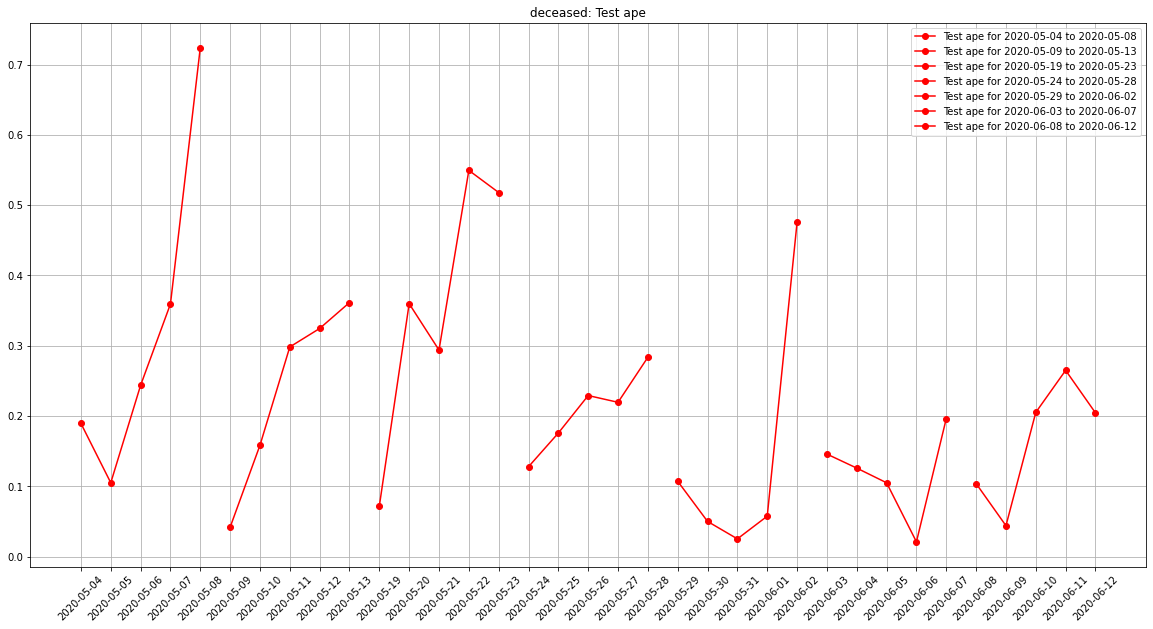

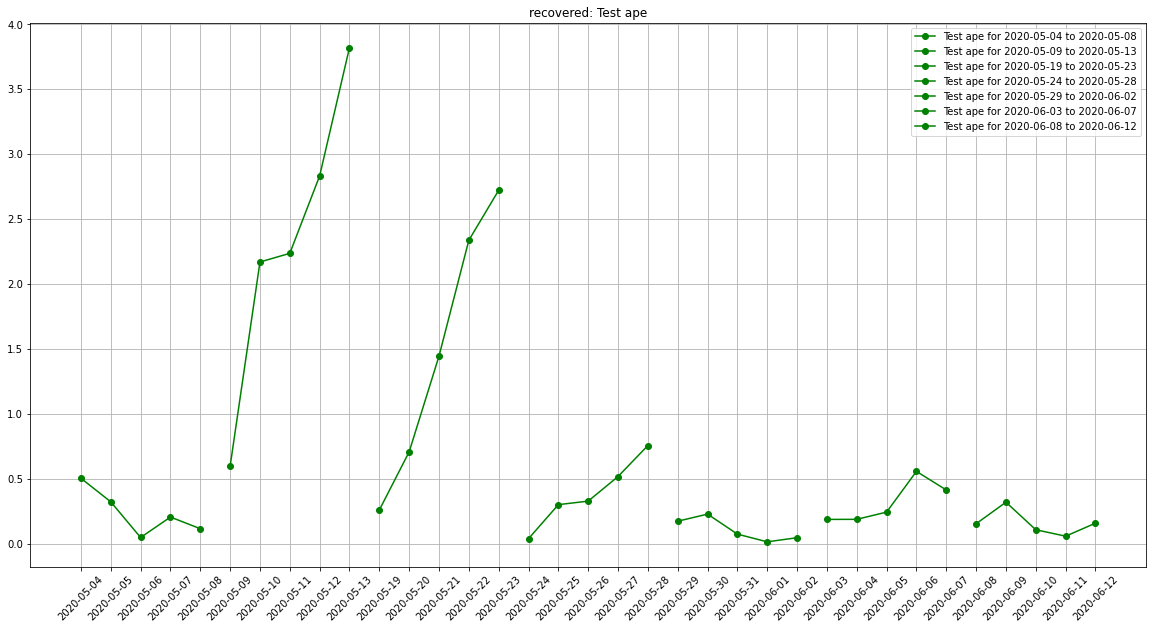

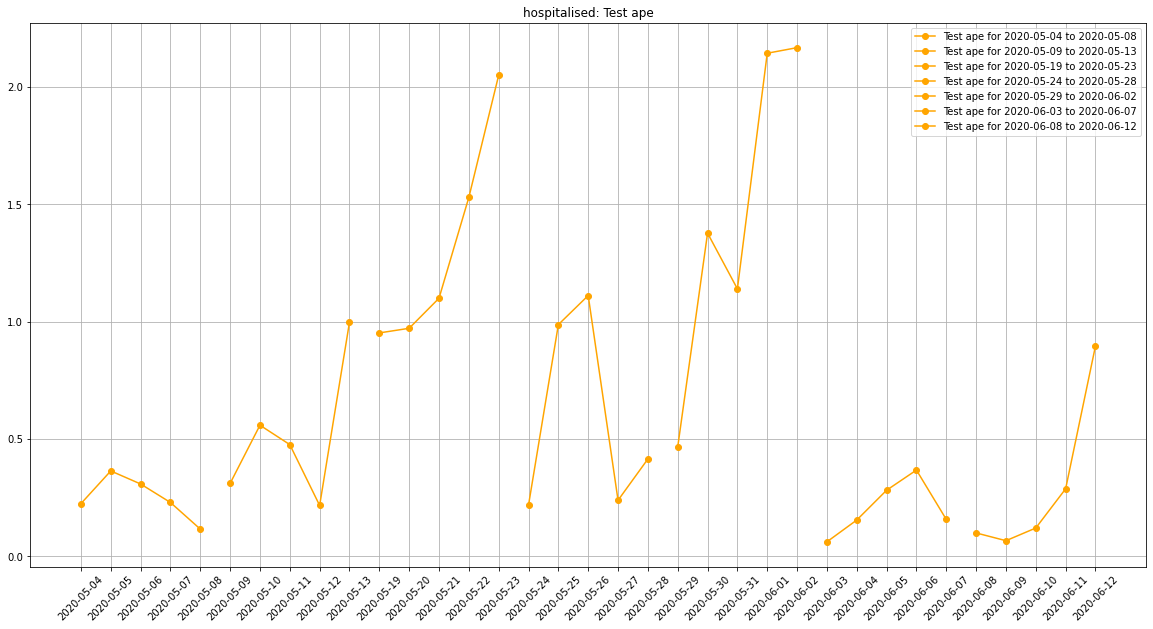

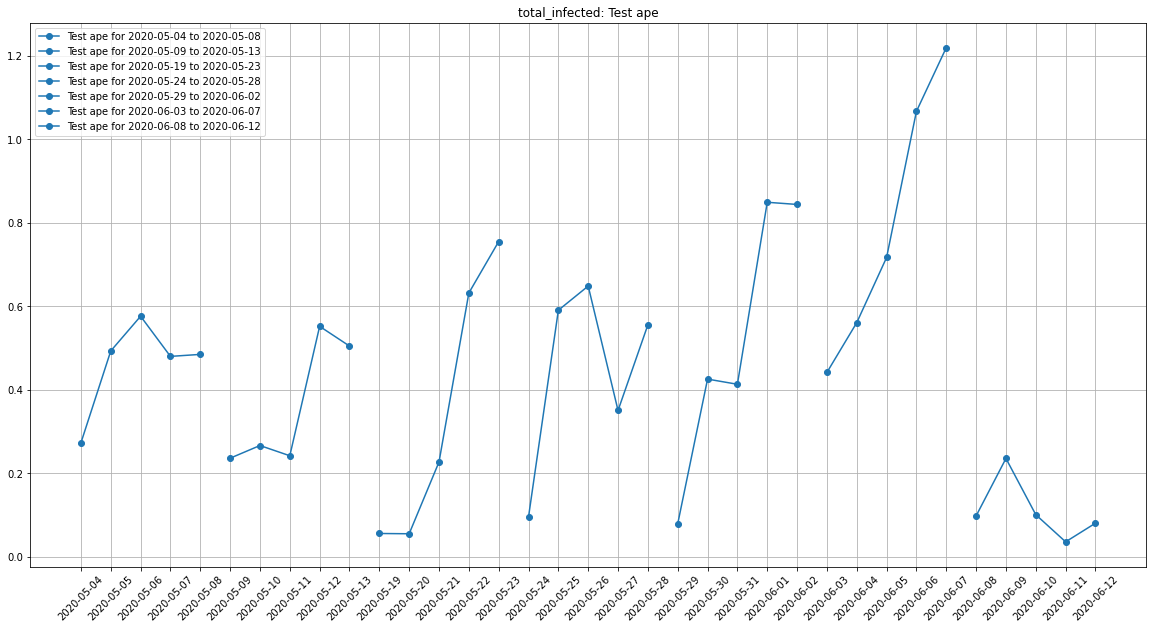

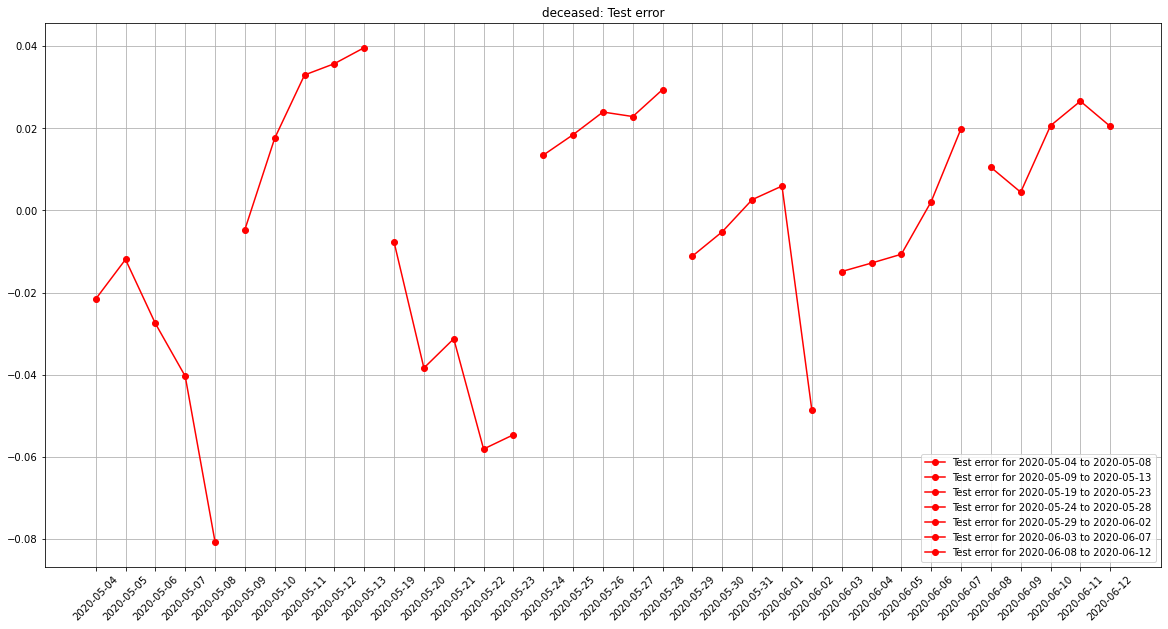

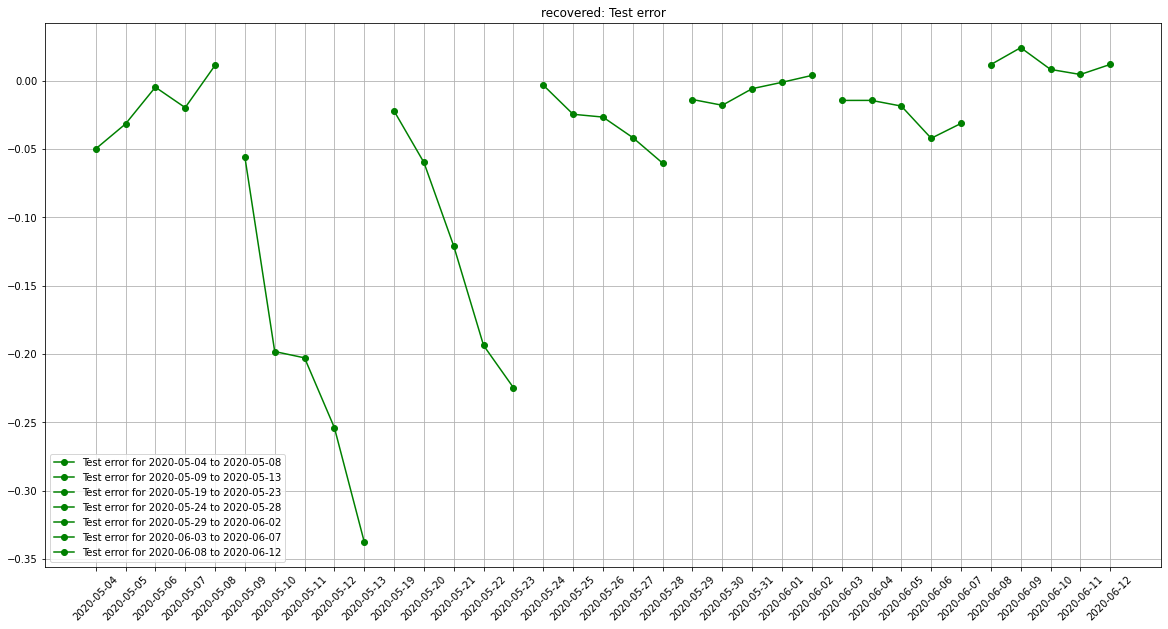

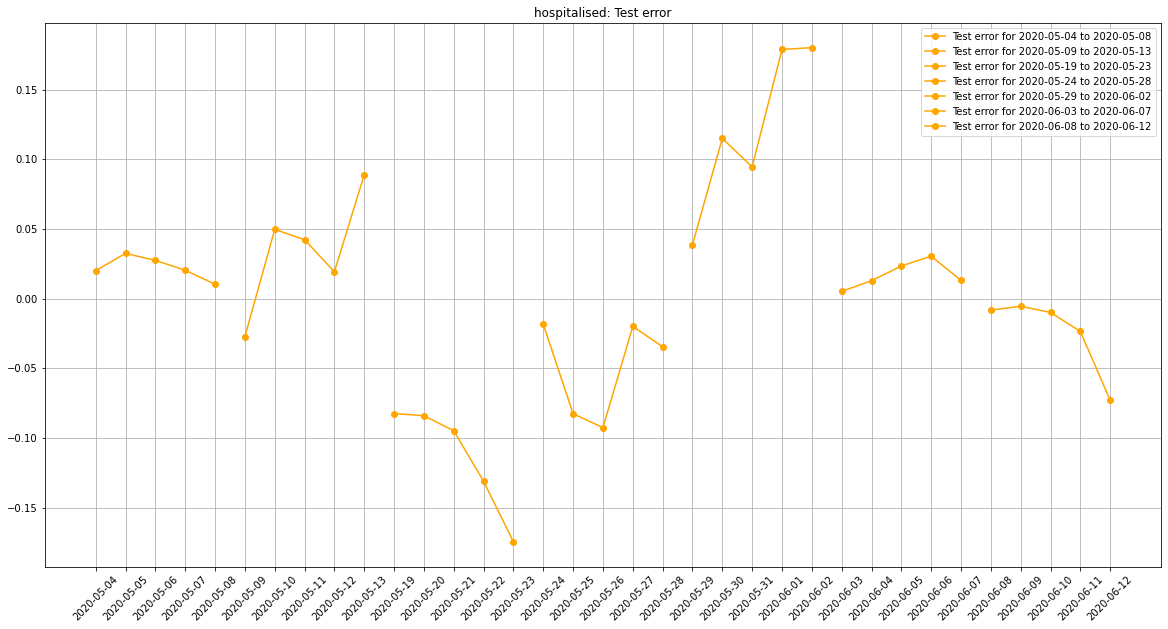

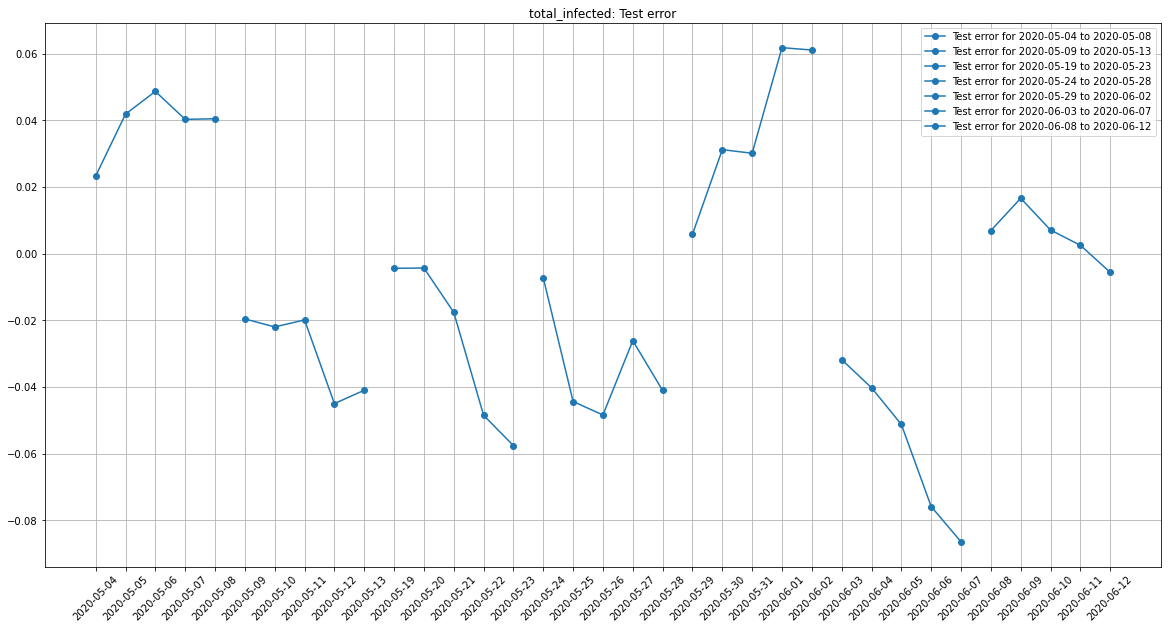

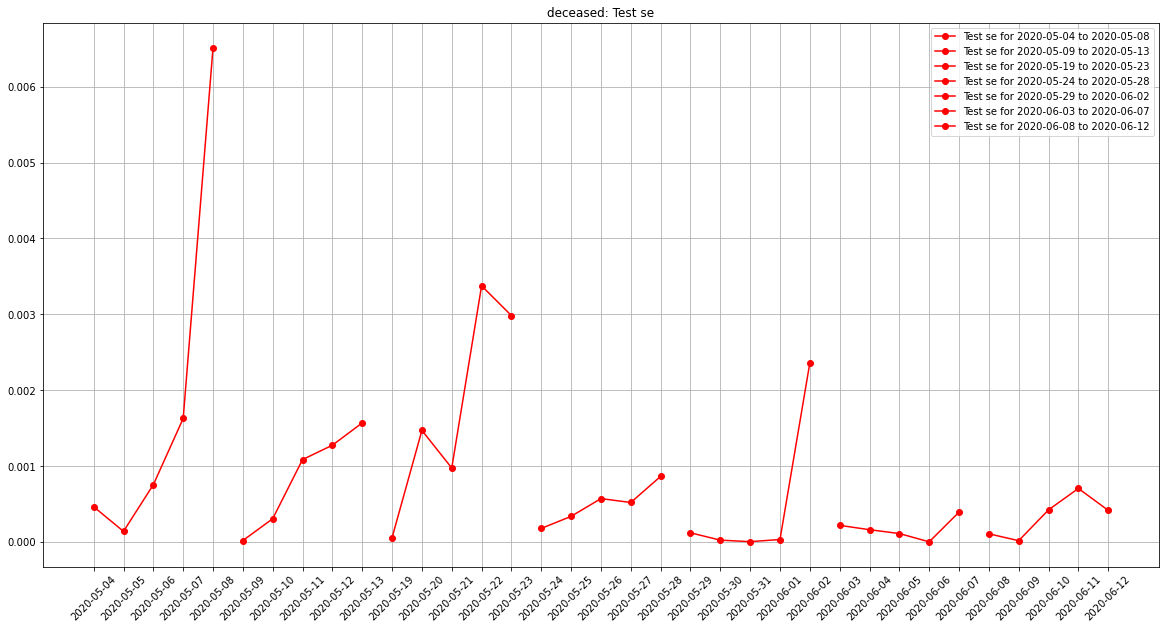

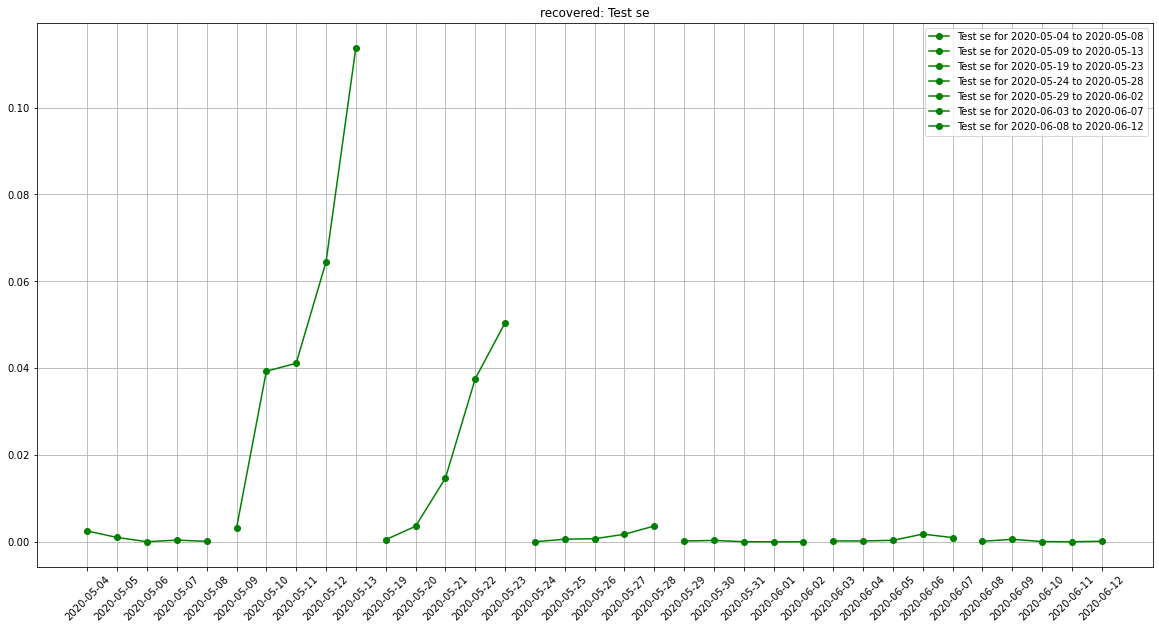

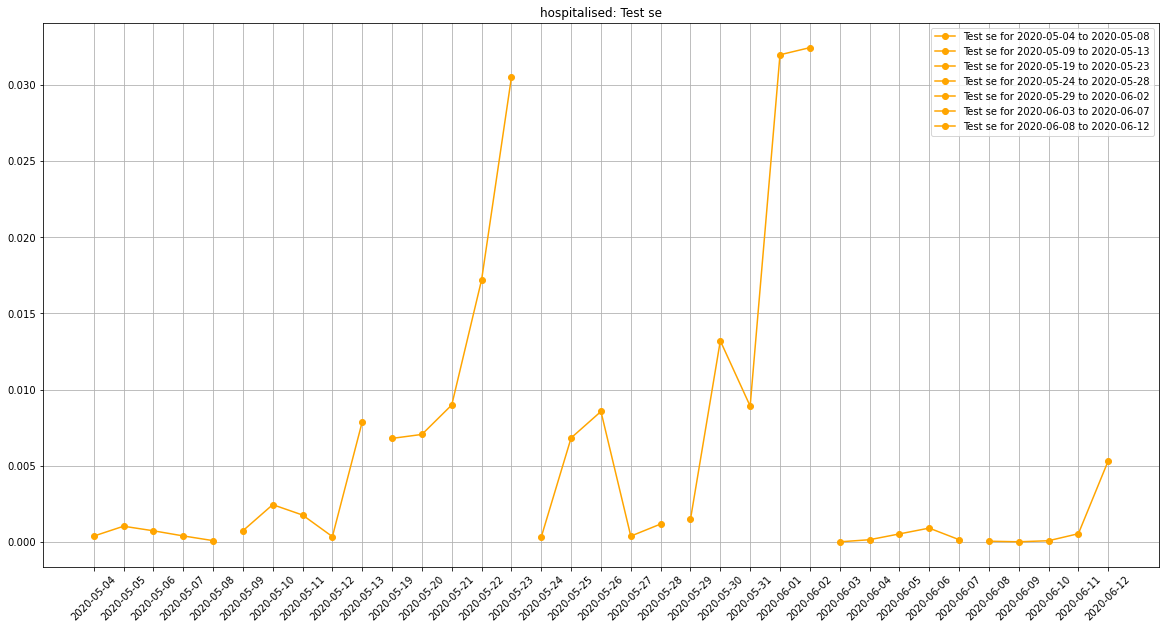

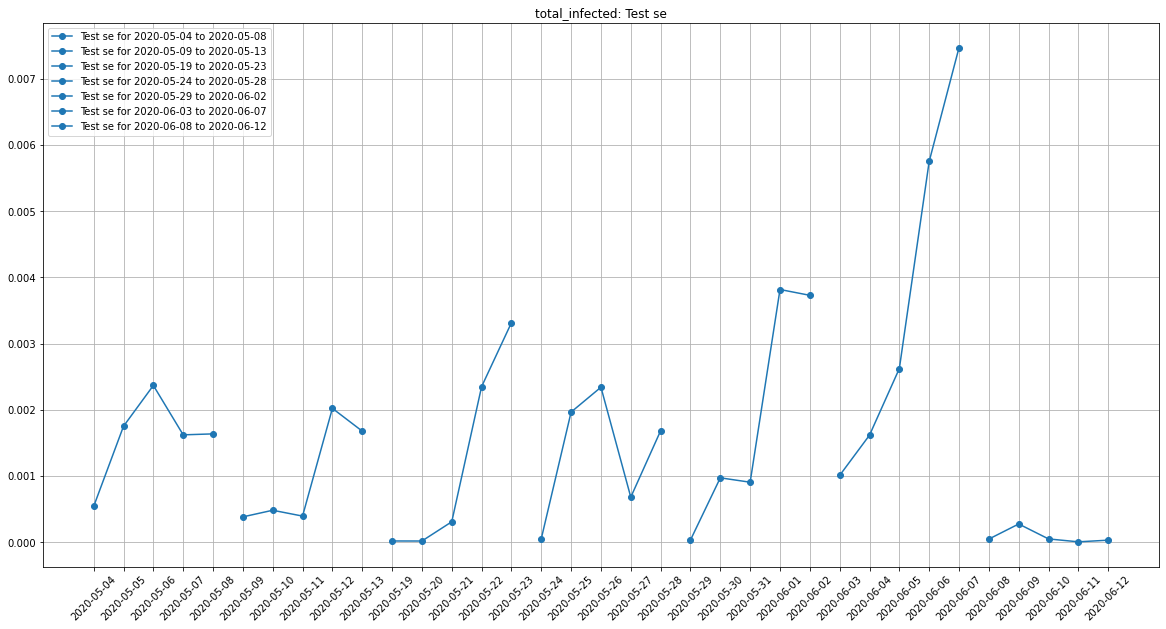

In [5]:
for i,lf in enumerate(loss_fn):
    for j,v in enumerate(var):
        fig, ax = plt.subplots(1, figsize=(20,10))
        for k in [0,1,3,4,5,6,7]:
            x1 = test_loss_df_list[k].columns[2:].tolist()
            # x1 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x1]
            df_y1 = test_loss_df_list[k].loc[v,]
            y1 = df_y1[np.logical_and(df_y1['split']  == 'val', df_y1['loss_functions'] == loss_fn[i])].values[0][2:]
#             x2 = train_loss_df_list[k].columns[2:].tolist()
#             x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in x2]
#             df_y2 = train_loss_df_list[k].loc[v,]
#             y2 = df_y2[np.logical_and(df_y2['split']  == 'train', df_y2['loss_functions'] == loss_fn[i])].values[0][2:]
            ax.plot(x1, y1, '-o', color=color[j], label=f'Test {loss_fn[i]} for {x1[0]} to {x1[4]}')
#             ax.plot(x2, y2, '-o', color=color_t[j], label=f'Train {loss_fn[i]} for {x2[0]} to {x2[9]}')
        ax.tick_params('x', labelrotation=45)
        plt.grid()
        plt.legend()
        plt.title(f'{v}: Test {lf}')